In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
Mcdonalds_data = pd.read_csv("C:\\Users\\saira\\Feynn Labs market segmentation(Prac_Mcdonalds_dataset)\\mcdonalds.csv")
from warnings import filterwarnings
filterwarnings("ignore")

# Understanding the data

In [2]:
Mcdonalds_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
Mcdonalds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
Mcdonalds_data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [5]:
print(pd.isnull(Mcdonalds_data).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [6]:
Mcdonalds_data.corr()

,Age
Age,1.0


# EDA (Exploratory Data Analysis)

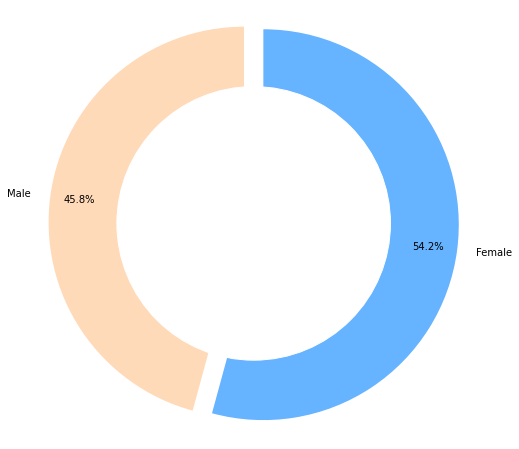

In [7]:
labels = ['Male','Female']
sizes = [Mcdonalds_data.query('Gender == "Male"').Gender.count(),Mcdonalds_data.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

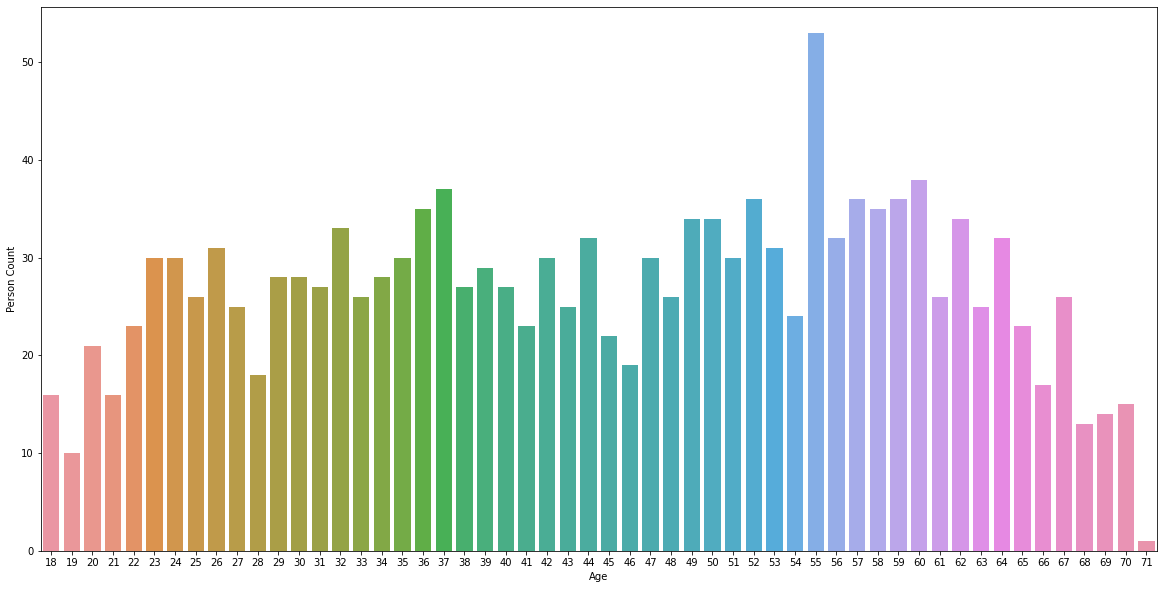

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(Mcdonalds_data.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

In [9]:
Mcdonalds_data['Like'].value_counts()


+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [10]:
Mcdonalds_data['VisitFrequency'].value_counts()


Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Gender'>

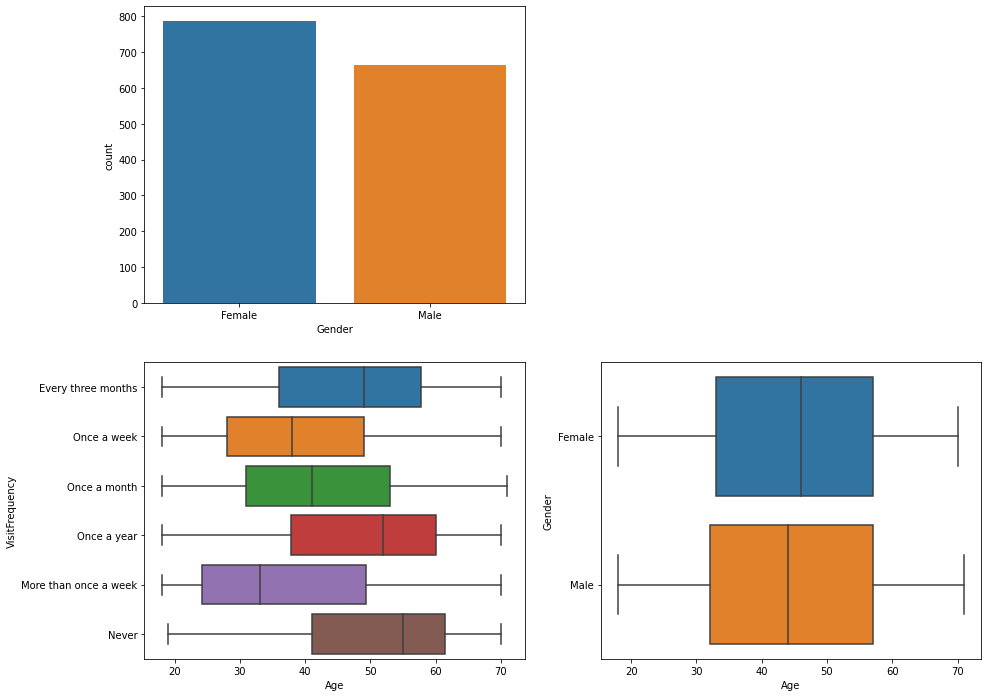

In [11]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.countplot(Mcdonalds_data.Gender)
plt.subplot(2,2,3)
sns.boxplot(Mcdonalds_data.Age,Mcdonalds_data.VisitFrequency)
plt.subplot(2,2,4)
sns.boxplot(Mcdonalds_data.Age,Mcdonalds_data.Gender)

<AxesSubplot:xlabel='VisitFrequency', ylabel='count'>

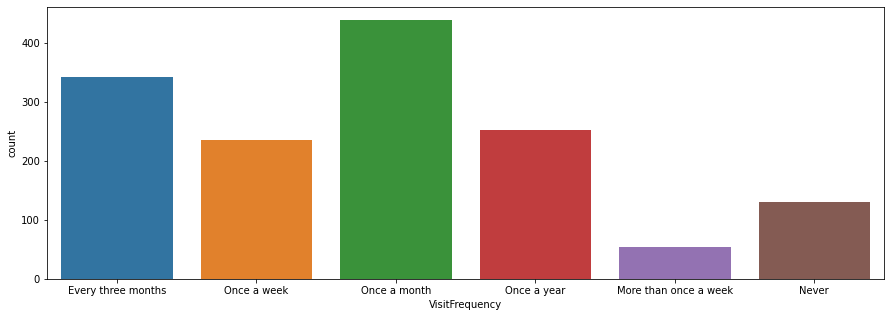

In [12]:
plt.rcParams['figure.figsize'] = [15, 5]
sns.countplot(Mcdonalds_data.VisitFrequency)

<AxesSubplot:xlabel='healthy', ylabel='count'>

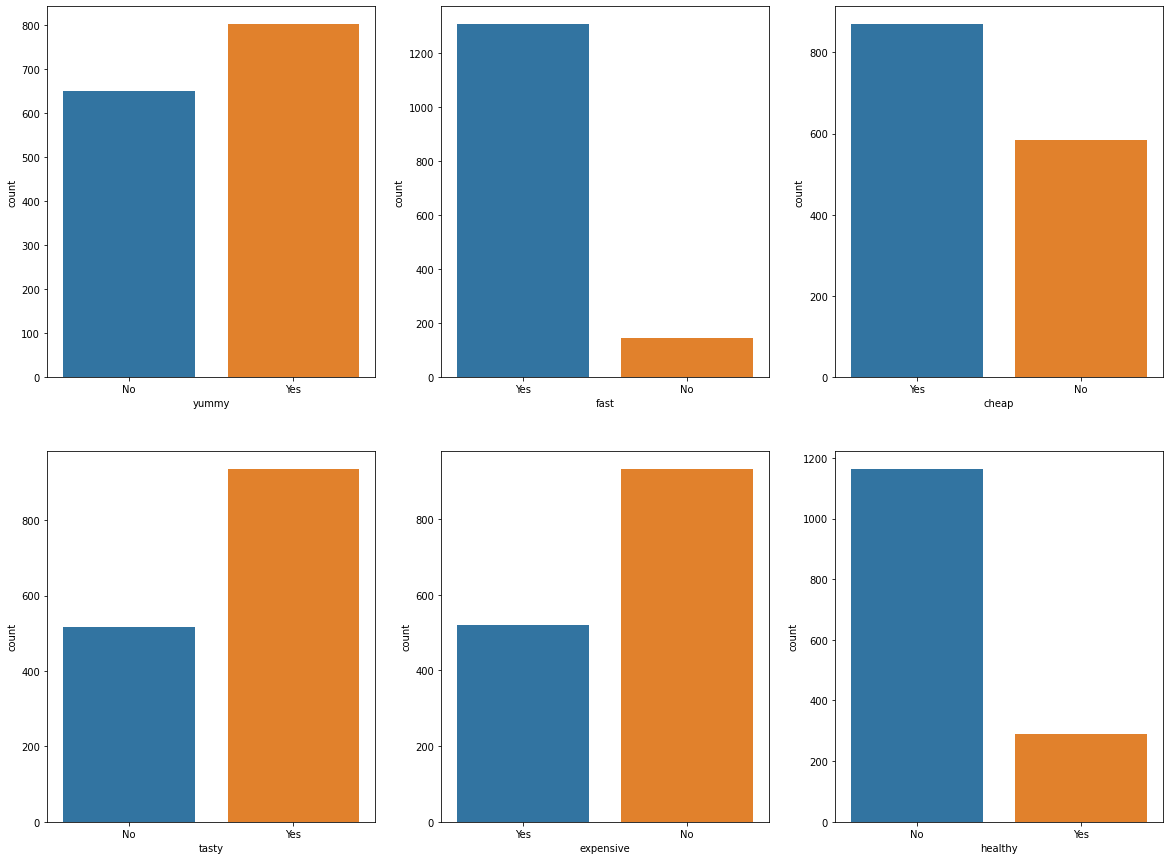

In [13]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.countplot(Mcdonalds_data.yummy)
plt.subplot(2,3,2)
sns.countplot(Mcdonalds_data.fast)
plt.subplot(2,3,3)
sns.countplot(Mcdonalds_data.cheap)
plt.subplot(2,3,4)
sns.countplot(Mcdonalds_data.tasty)
plt.subplot(2,3,5)
sns.countplot(Mcdonalds_data.expensive)
plt.subplot(2,3,6)
sns.countplot(Mcdonalds_data.healthy)


<AxesSubplot:xlabel='disgusting', ylabel='count'>

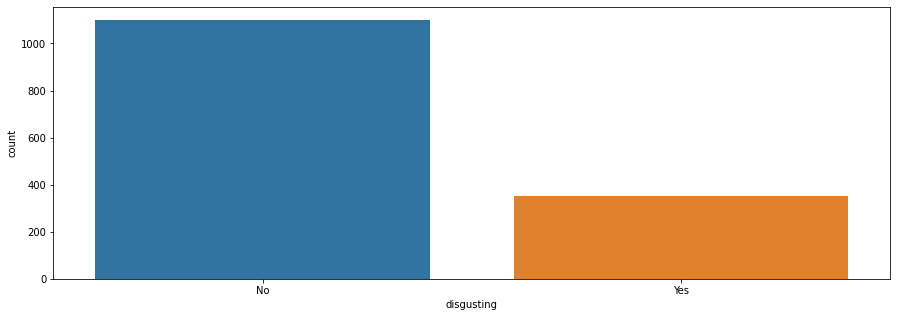

In [14]:
sns.countplot(Mcdonalds_data.disgusting)

<AxesSubplot:xlabel='VisitFrequency', ylabel='Age'>

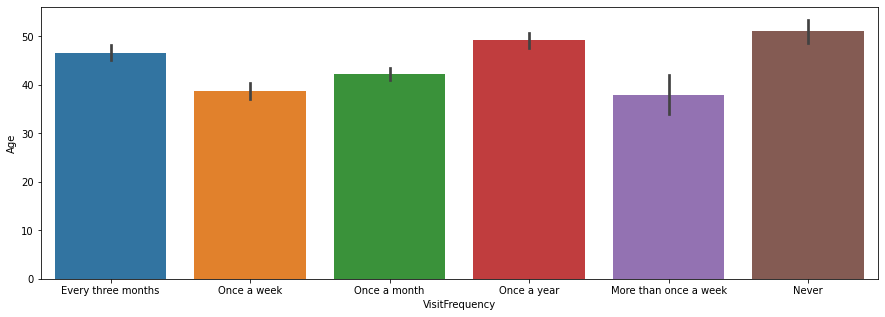

In [15]:
sns.barplot(x=Mcdonalds_data['VisitFrequency'], y=Mcdonalds_data['Age'])


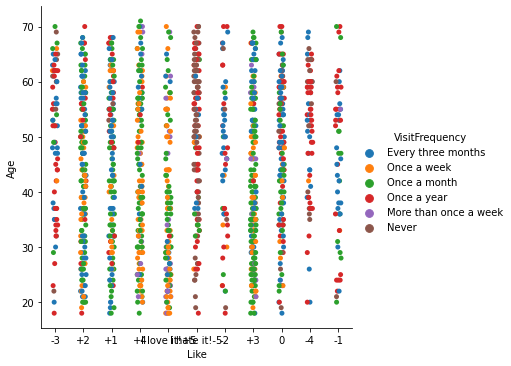

In [16]:
sns.catplot(x="Like", y="Age", hue="VisitFrequency", kind="strip", data=Mcdonalds_data)


# Data Preprocessing

Using Label Encoder to convert categorical data into numerical data 

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
categorical = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
for elements in categorical:
    Mcdonalds_data[elements] = le.fit_transform(Mcdonalds_data[elements])

In [18]:
Mcdonalds_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [19]:
scale_mapper = {"I hate it!-5" :1, "-4":2, "-3":3, "-2":4, "-1":5, "0":6, "+1":7, "+2":8, "+3":9, "+4":10, "I love it!+5":11}
Mcdonalds_data["Like"] = Mcdonalds_data["Like"].replace(scale_mapper)

In [20]:
scale_mapper_visit = {"Once a month":1, "Every three months":3, "Once a year":3, "Once a week": 4, "Never" : 0, "More than once a week":5}
Mcdonalds_data["VisitFrequency"] = Mcdonalds_data["VisitFrequency"].replace(scale_mapper_visit)


In [21]:
scale_mapper_gender = {"Male":1, "Female":0}
Mcdonalds_data["Gender"] = Mcdonalds_data["Gender"].replace(scale_mapper_gender)

In [22]:
Mcdonalds_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,3,61,3,0
1,1,1,0,1,1,1,1,1,1,0,0,8,51,3,0
2,0,1,1,1,1,1,0,1,1,1,0,7,62,3,0
3,1,1,0,1,1,1,1,1,0,0,1,10,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,8,49,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,1,47,3,1
1449,1,1,0,1,0,0,1,1,0,1,0,8,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,9,52,1,0
1451,1,1,0,0,0,1,1,1,0,1,0,10,41,3,1


Dropping the redundant and similar column

In [23]:
Mcdonalds_data.drop(columns=['yummy'],inplace=True)

Performing ANOVA test to check the relevance of the remainig categorical values

In [24]:
for i in Mcdonalds_data:
    from statsmodels.formula.api import ols
    rel = "Age ~ " + str(i)
    model = ols(rel,Mcdonalds_data).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    print(rel,"--->  ",round(anova_results.iloc[0,4],4))

Age ~ convenient --->   0.0071
Age ~ spicy --->   0.0
Age ~ fattening --->   0.0
Age ~ greasy --->   0.0
Age ~ fast --->   0.4336
Age ~ cheap --->   0.5184
Age ~ tasty --->   0.0
Age ~ expensive --->   0.0069
Age ~ healthy --->   0.4158
Age ~ disgusting --->   0.4104
Age ~ Like --->   0.0
Age ~ Age --->   0.0
Age ~ VisitFrequency --->   0.0004
Age ~ Gender --->   0.4496


# PCA 

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(Mcdonalds_data)
pca_samples = pca.transform(Mcdonalds_data)

In [26]:
pca = pd.DataFrame(pca_samples)
pca.head()

,0,1,2,3,4,5
0,-16.584121,2.695764,1.129371,-0.147622,-0.081542,0.647280
1,-6.298764,-1.661955,0.508145,0.155817,-0.799400,-0.195581
2,-17.339826,-1.335013,0.660527,0.795326,-0.705576,0.143794
3,-24.145287,-4.719469,1.306252,-0.196898,-1.058203,-0.768220
4,-4.329993,-1.271587,-1.461542,-0.288473,0.244189,-0.706069


(1453, 2)
          5         1
0  0.647280  2.695764
1 -0.195581 -1.661955
2  0.143794 -1.335013
3 -0.768220 -4.719469
4 -0.706069 -1.271587


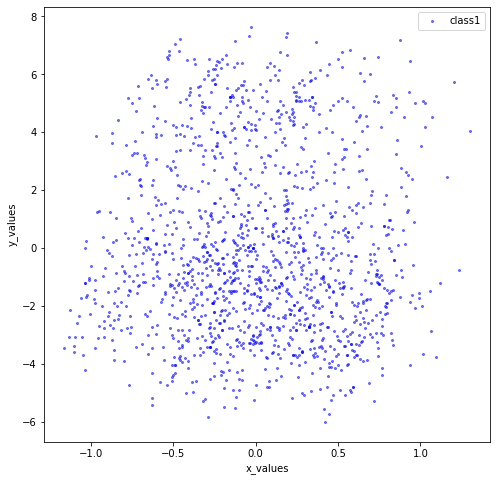

In [27]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(pca[[5,1]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[5], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

# Data Standardization (Input Data)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Mcdonalds_data_standard=scaler.fit_transform(Mcdonalds_data)

In [29]:
Mcdonalds_data_standard

array([[ 0.31873518, -0.32134871,  0.39137527, ...,  1.15325815,
         0.46063389, -0.918645  ],
       [ 0.31873518, -0.32134871,  0.39137527, ...,  0.44983942,
         0.46063389, -0.918645  ],
       [ 0.31873518,  3.11188424,  0.39137527, ...,  1.22360002,
         0.46063389, -0.918645  ],
       ...,
       [ 0.31873518, -0.32134871,  0.39137527, ...,  0.5201813 ,
        -0.98182526, -0.918645  ],
       [ 0.31873518, -0.32134871, -2.55509245, ..., -0.2535793 ,
         0.46063389,  1.08855979],
       [ 0.31873518, -0.32134871,  0.39137527, ..., -1.0273399 ,
         0.46063389,  1.08855979]])

In [30]:
import sklearn
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [31]:
hop=hopkins(Mcdonalds_data_standard,150)
print(hop)

0.18056690009452012


## Using Elbow Method to find the optimal (k) value for clustering

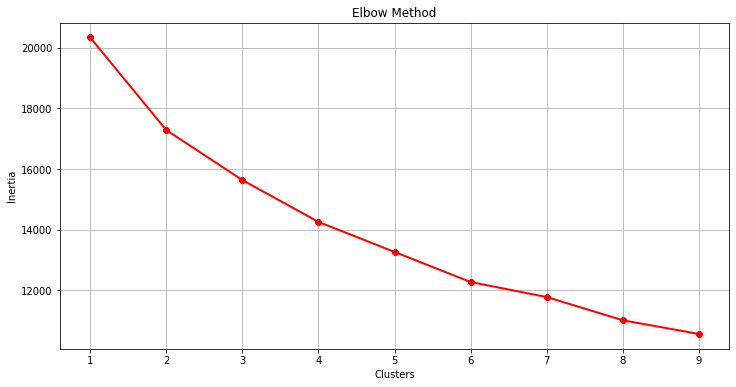

In [32]:
clusters = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(Mcdonalds_data_standard)
    clusters.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,10),clusters, linewidth=2, color="red", marker ="8")
plt.xlabel("Clusters")
plt.xticks(np.arange(1,10,1))
plt.ylabel("Inertia")
plt.title('Elbow Method')
plt.show()

# Implementing KMeans Clustering

In [33]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(Mcdonalds_data_standard)

clusters=kmeans.cluster_centers_
print(clusters)

[[ 0.20634052  3.11188424 -0.0158601   0.19931879  0.14307459  0.03901872
   0.23375634  0.18622981  0.23494673  0.05910298 -0.03019679  0.4046605
   0.07363266  0.12575424]
 [ 0.22883569 -0.32134871  0.29770144  0.02218187 -0.12025917 -1.12134886
   0.25422254  0.98377657 -0.19418094 -0.3575744   0.33685949 -0.31517927
   0.08334328  0.11976441]
 [ 0.28417382 -0.32134871  0.38548234  0.06710048  0.24620453  0.79004275
   0.2293751  -0.71317667 -0.29786384 -0.39393891  0.24744672 -0.14159504
   0.07838222 -0.163936  ]
 [ 0.18831496 -0.20798725 -1.65169433 -0.97889761  0.14409818  0.41441588
   0.47718525 -0.51039761  1.42787934 -0.51149429  0.69075463  0.31977332
   0.20207989 -0.06652976]
 [-1.05355409 -0.24561563  0.20722104  0.52126807 -0.4766161  -0.36650787
  -1.22266123  0.37316056 -0.42459684  1.55094603 -1.40809749  0.22898663
  -0.44090308  0.14399283]]


In [34]:
y_prediction = kmeans.fit_predict(Mcdonalds_data_standard)
print(y_prediction)

[4 4 1 ... 2 3 0]


# Hierarchical Clustering

In [35]:
Mcdonalds_data_clustering = Mcdonalds_data.sample(frac=0.025)


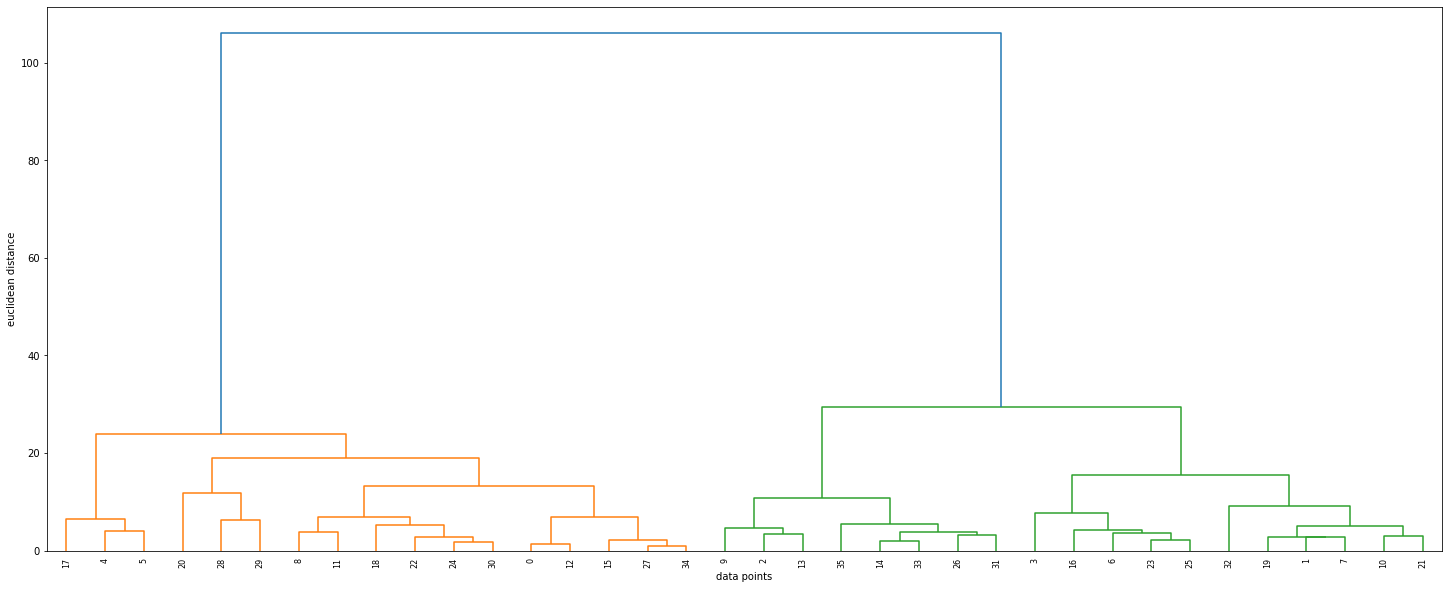

In [36]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

merg = linkage(Mcdonalds_data_clustering,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [37]:
Hierarchical_cluster = AgglomerativeClustering(n_clusters = 3,affinity= "euclidean",linkage = "ward")
Hierarchical_cluster_predict = Hierarchical_cluster.fit_predict(Mcdonalds_data_clustering)

In [38]:
Hierarchical_cluster_predict

array([0, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2], dtype=int64)